In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 생성
x = torch.randn(100,2)
y = ((x[:,0] > 0.5) & (x[:,1] > 0.5)).float()

In [3]:
# 모델 정의
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return F.sigmoid(out)

C:\anaconda3\envs\condatorch\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


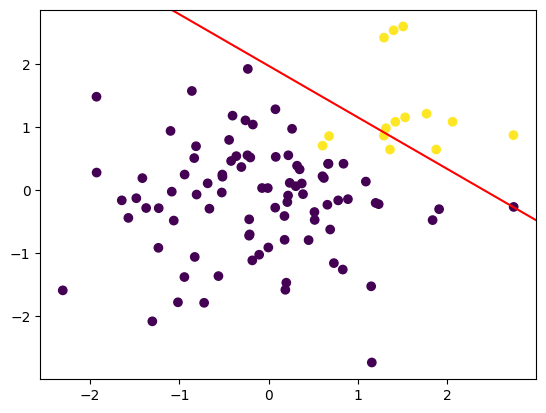

In [4]:
model = LogisticRegression(input_dim=2, output_dim=1)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    outputs = model(x)
    loss = criterion(outputs.squeeze(), y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.scatter(x[:,0], x[:,1], c=y)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  

# np.meshgrid = x,y 좌표 기반 격자포인트
# xx,yy = 2차원 배열

z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy() 

# np.c_[] = xx yy 연결 -> torch.tensor 변경 후 ravel() = 2차원 배열 1차원 화 -> detach.numpy = 예측값을 넘파이로 변환 

z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='red') # xx, yy 격자에 대응하는 결정경계 그리는 함수
plt.show()